In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from melodies_monet import driver

import warnings
warnings.filterwarnings("ignore")

In [2]:
an = driver.analysis()
an.control = "control_modis_l2.yaml"
an.read_control()

In [3]:
an.control_dict

{'analysis': {'start_time': '2020-09-09',
  'end_time': '2020-09-12',
  'time_interval': '24h',
  'output_dir': '$HOME/Plots',
  'debug': True,
  'regrid': True,
  'target_grid': 'obs_grid'},
 'obs_grid': {'start_time': '2020-09-09',
  'end_time': '2020-09-12',
  'ntime': 72,
  'nlat': 180,
  'nlon': 360},
 'obs': {'Terra_MODIS': {'debug': False,
   'obs_type': 'sat_swath_clm',
   'sat_type': 'modis_l2',
   'filename': '/glade/campaign/acom/acom-da/melodies-monet-data/example_observation_data/satellite/MODIS/Terra/C61/2020/*/MOD04_L2.*.hdf',
   'variables': {'AOD_550_Dark_Target_Deep_Blue_Combined': {'minimum': 0.0,
     'maximum': 10.0,
     'scale': 0.001,
     'units': 'none'}}},
  'Aqua_MODIS': {'debug': False,
   'obs_type': 'sat_swath_clm',
   'sat_type': 'modis_l2',
   'filename': '/glade/campaign/acom/acom-da/melodies-monet-data/example_observation_data/satellite/MODIS/Aqua/C61/2020/*/MYD04_L2.*.hdf',
   'variables': {'AOD_550_Dark_Target_Deep_Blue_Combined': {'minimum': 0.0,
 

In [4]:
an.open_models()

reanalysis
/glade/campaign/acom/acom-da/melodies-monet-data/example_model_data/MERRA2/tavg1_2d_aer_Nx/*nc4
**** Reading Unspecified model output. Take Caution...


In [5]:
an.setup_obs_grid()

initializing gridded data and counts  Terra_MODIS AOD_550_Dark_Target_Deep_Blue_Combined
initializing gridded data and counts  Aqua_MODIS AOD_550_Dark_Target_Deep_Blue_Combined


In [6]:
an.setup_regridders()

setup_regridder.target_grid
<xarray.DataArray (lon: 360, lat: 180)> Size: 518kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5


In [7]:
for time_interval in an.time_intervals:
    print(time_interval)
    an.open_obs(time_interval=time_interval)
    an.update_obs_gridded_data()

[Timestamp('2020-09-09 00:00:00', freq='24H'), Timestamp('2020-09-10 00:00:00', freq='24H')]
Reading MODIS L2
reading /glade/campaign/acom/acom-da/melodies-monet-data/example_observation_data/satellite/MODIS/Terra/C61/2020/253/MOD04_L2.A2020253.0045.061.2020253131855.hdf
AOD_550_Dark_Target_Deep_Blue_Combined
min, max:  -9999   301
reading /glade/campaign/acom/acom-da/melodies-monet-data/example_observation_data/satellite/MODIS/Terra/C61/2020/253/MOD04_L2.A2020253.0050.061.2020253131710.hdf
AOD_550_Dark_Target_Deep_Blue_Combined
min, max:  -9999   291
reading /glade/campaign/acom/acom-da/melodies-monet-data/example_observation_data/satellite/MODIS/Terra/C61/2020/253/MOD04_L2.A2020253.0055.061.2020253131738.hdf
AOD_550_Dark_Target_Deep_Blue_Combined
min, max:  -9999   986
reading /glade/campaign/acom/acom-da/melodies-monet-data/example_observation_data/satellite/MODIS/Terra/C61/2020/253/MOD04_L2.A2020253.0100.061.2020253131815.hdf
AOD_550_Dark_Target_Deep_Blue_Combined
min, max:  -9999 

In [8]:
an.normalize_obs_gridded_data()

Terra_MODIS_AOD_550_Dark_Target_Deep_Blue_Combined
Aqua_MODIS_AOD_550_Dark_Target_Deep_Blue_Combined


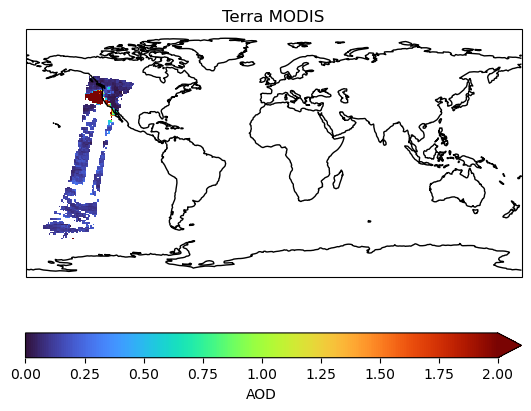

In [9]:
ax = plt.subplot(projection=ccrs.PlateCarree())
an.obs_gridded_dataset["Terra_MODIS_AOD_550_Dark_Target_Deep_Blue_Combined_data"].isel(time=19).plot.pcolormesh(
    cmap=plt.cm.turbo,
    cbar_kwargs={'location': 'bottom', 'label': 'AOD'},
    x='lon', y='lat', vmin=0, vmax=2, ax=ax)
ax.set_title('Terra MODIS')
ax.coastlines()

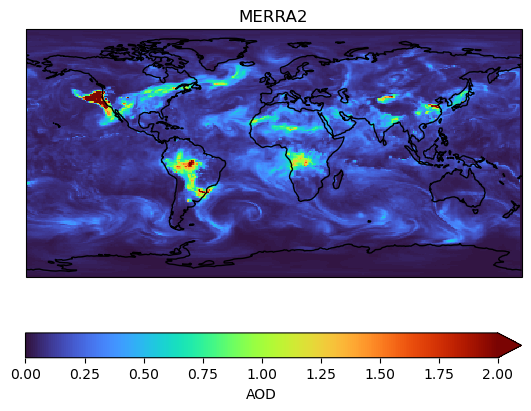

In [10]:
for model in an.models:
    regridder = an.model_regridders[model]
    ds_model_regrid = regridder(an.models[model].obj)
    ax = plt.subplot(projection=ccrs.PlateCarree())
    ds_model_regrid["TOTEXTTAU"].isel(time=19).plot.pcolormesh(
        cmap=plt.cm.turbo,
        cbar_kwargs={'location': 'bottom', 'label': 'AOD'},
        x='lon', y='lat', vmin=0, vmax=2, ax=ax)
    ax.set_title(model)
    ax.coastlines()